In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

In a logistic regression with $n$ features and $m$ training samples,
we want to predict a binary output variable $y$ which has 0 or 1 values.

## Hypostesis representation
Specifically, we want to predict the probability of a samples to yield
0 or 1 output.

The features are usually real numbers, so we need a link between real
numbers to a `[0..1]` range expressing the probability of the output.
In logistic regression this link is provided by the **logistic function**:

$$\textrm{logistic function:}\quad g(z) = \frac{1}{1 + e^{-z}}$$

In this context, the hypothesis is:

$$h_\theta(x) = g(\theta^T x)$$

representing the probability that, with a given parameter vector $\theta$,
a sample $x$ yields $y = 1$. In equations:

$$P(y = 1|\theta, x) = h_\theta(x) = g(\theta^T x)$$

Equivalent expressions:

$$P(y = 1|\theta, x) = \frac{e^{\theta^T x}}{1 + e^{\theta^T x}}$$
$$P(y = 0|\theta, x) = \frac{1}{1 + e^{\theta^T x}}$$

The ratio is called *odds*, and taking the log we obtain the *log-odds*:

$$\log \frac{P(y = 1|\theta, x)}{P(y = 0|\theta, x)} = \theta^T x$$

The previous function is the inverse of the logistic function is called the **logit function** (or *log of odds* function):

$$\textrm{logit function:}\quad g^{-1}(z) = \log{\frac{p}{1-p}}$$


## Decision boundary

To convert probability to a discrete output (0 or 1) we need to set a threshold. Typically we predict:

$$ y = 1\quad \textrm{if} \quad h_\theta(x) \ge 0.5 $$

$$ y = 0\quad \textrm{if} \quad h_\theta(x) < 0.5 $$

The locus of points in the **sample space** where $h_\theta(x) = 0.5$ is the **decision boundary** for a given "optima $\theta$". Given the shape of $g(z)$, the decision boundary is given by the $x$ satisfying the equation:

$$\theta^T x = 0$$

So, with $n$ features, the decision boundary is an hyper-plane of dimension $n-1$.

Like for polynomial regression, we can add features
by adding powers of pre-existing features. For example with 1 feature,
and adding the 2-power, the decision boundary becomes:

$$\theta_0 + \theta_1 x_1 + \theta_2 x_1^2 =0$$

Here, the decision boundary is a range instead of a point.
With 2 features, adding powers of 2 we obtain:

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2  =0$$

which is the equation of an ellipsis. In general, adding higher powers and
cross-products we can obtain complex surfaces as decision boundaries.
However, the problem to keep in mind is that often, adding polynomial features leads to overfitting.



## Cost function

In the previous sections we specified a model able 
to predict probabilities ($h_\theta(x)$) 
and to assign classes (via decision boundary).
Now we tackle the problem on finding the "optimal" $\theta$
given a training set $X$.

We need to define a cost function $J(\theta)$ to be minimized.

$$J(\theta) = \frac{1}{m} 
\sum_{i=1}^m \textrm{Cost}(h_\theta(x^{(i)}), y^{(i)})$$

In logistic regression, remembering that $y$ is either 0 or 1 
and $h_\theta(x)$ has values in $[0..1]$, we define:

\begin{align}
\textrm{Cost}(h_\theta(x), y) = &- y \; \log h_\theta(x) \\
                                &- (1 - y) \; \log (1 - h_\theta(x))
\end{align}

Intuitively minimizing this function "works", because that it penalizes
$\theta$ which yield $h_\theta(x)$ far from the true class.
Theoretically, this cost function comes from finding the maximum likelihood of a Bernoulli random variable.

Rewriting $J(\theta)$ we obtain:

\begin{align}
J(\theta) 
    &= -\frac{1}{m} \sum_{i=1}^m 
    \left[y^{(i)} \; \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \; \log (1 - h_\theta(x^{(i)}))\right] \\
    &= -\frac{1}{m} \sum_{i=1}^m 
    \left[y^{(i)} \theta^T x^{(i)} - \log(\exp(\theta^T x^{(i)}) + 1)
    \right] \\  
\end{align}

In vectorized form:

$$h_\theta(X) = g(X\,\theta)$$

\begin{align}
J(\theta) 
&=  - \frac{1}{m} \left[ y^T \log g(X\,\theta) 
    + (1 - y^T) \log (1 - g(X\,\theta)) \right] \\
&=  - \frac{1}{m} \left[ y^T \, X \, \theta + \log (\exp(X \, \theta) + 1) \right]
\end{align}

### Notes:

- The cost function in logistic regression is convex: http://mathgotchas.blogspot.com/2011/10/why-is-error-function-minimized-in.html

### Passages

$$ y \, \log g(X\theta) = y \, X\theta - y \, \log(\exp(X\theta) + 1)$$

$$(1 - y) \, \log (1 - g(X\theta)) = - (1 - y) \, \log(\exp(X\theta) + 1)$$

## Gradient Descent: update formula

As for linear regression, in gradient descent, at each iteration, we update $\theta$ according to:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

for all $j$ at the same time. We repeat until we converge or we reach
the max allowed iterations.

Computing the partial derivative of $J(\theta)$ (passages not shown),
we obtain the same formal expression as for linear regression:

$$ \frac{\partial}{\partial \theta_j} J(\theta) = 
\frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)\, x_j^{(i)}$$

With substitutions for logistic regression, we obtain:

\begin{align}
\frac{\partial}{\partial \theta_j} J(\theta) 
&= \frac{1}{m} \sum_{i=1}^m \left( g(\theta^T x^{(i)}) - y^{(i)} \right)\, x_j^{(i)} \\
\nabla J(\theta) &= \frac{1}{m} X^T \left( g(X\theta) - y \right)
\end{align}

So, the vectorial update formula becomes:

$$\theta := \theta - \frac{\alpha}{m} X^T \left( g(X\theta) - y \right)$$



## logistic and logit

The inverse of the logistic function is the **logit function** (or *log of odds* function):

$$\textrm{logit function:}\quad g^{-1}(z) = \log{\frac{p}{1-p}}$$


## Regularization

Regularization is a modification to the cost function that helps fighting overfitting.
In particular we penalize high values of parameters, introducing a "shrinkage"
term which makes parameters close to the origin preferable.

### Ridge regularization

The regularized cost function is:

$$J_r(\theta) = J(\theta) + \frac{\lambda}{2 m} \, \|\theta\|^2 
\quad \textrm{the norm excludes }\theta_0$$

The regularized gradient descent step is:

$$\theta_j := \theta_j - \alpha \left[ \frac{\partial}{\partial \theta_j} J(\theta) 
+ \frac{\lambda}{m} \theta_j\right]
= \theta_j\left(1 - \alpha \frac{\lambda}{m} \right) - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

for $j = [1..n]$ (the update formula for $\theta_0$ remains unmmodified).

# Load Data

Load data in a nicely formatted DataFrame:

In [4]:
df = (pd.read_csv('machine-learning-ex2/ex2/ex2data2.txt', header=None)
      .rename(columns={0: 'test1', 1: 'test2', 2: 'broken'})
      .rename_axis('sample', axis='index')
      .rename_axis('feature', axis='columns')
      .assign(broken=lambda x: x.broken.astype(bool))
     )
df_orig = df.copy()
df.head()

feature,test1,test2,broken
sample,,,
0,0.051267,0.69956,True
1,-0.092742,0.68494,True
2,-0.213710,0.69225,True
3,-0.375000,0.50219,True
4,-0.513250,0.46564,True


In [5]:
df.dtypes

feature
test1     float64
test2     float64
broken       bool
dtype: object

In [7]:
df_tidy = df.melt(id_vars='broken')
df_tidy.sample(5)

,broken,feature,value
168,True,test2,0.57529
47,True,test1,0.22408
181,False,test2,0.59722
131,True,test2,-0.18494
65,False,test1,0.92684


# Explore data


## Features vs target

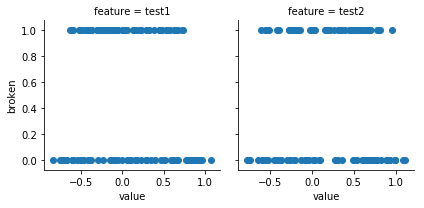

In [8]:
g = sns.FacetGrid(df_tidy, col="feature", sharex=False)
g.map(plt.scatter, "value", "broken");

## Pairplot of all features and output variable

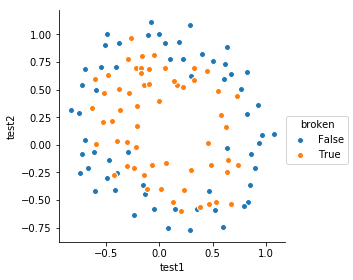

In [9]:
sns.pairplot(df, hue='broken', x_vars=['test1'], y_vars=['test2'], size=4);

# Data for logistic regression

It is nice to have DataFrames, but for the underlying number crunching we use numpy.
Here we get the variables we need for linear regression as numpy arrays:

In [10]:
X = df[['test1', 'test2']].values  # features for each sample
y = df['broken'].values          # target to be predicted
n = X.shape[1]                     # number of features
n

2

In [11]:
X.shape

(118, 2)

## Scikit-learn

Scikit-learn only provides 
[regularized logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
For this exercise, we make it un-regularized by setting 
`C` to an high value ($C^{-1} = \lambda$ the regularization strength).

`LogisticRegression` can also fit the intercept without the need of adding
the 1-column dummy feature.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [25]:
pol_trans = PolynomialFeatures(6).fit(X)
Xp = pol_trans.transform(X)
Xp.shape

(118, 28)

In [33]:
model = LogisticRegression(C=1, solver='lbfgs')
model.fit(Xp, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
model.coef_, model.intercept_

(array([[-9.40316896e-05,  6.25200403e-01,  1.18110372e+00,
         -2.01998737e+00, -9.17422545e-01, -1.43161951e+00,
          1.24007673e-01, -3.65545995e-01, -3.57235803e-01,
         -1.75177398e-01, -1.45813451e+00, -5.09079430e-02,
         -6.15531333e-01, -2.74684592e-01, -1.19285084e+00,
         -2.42159297e-01, -2.06009268e-01, -4.46834189e-02,
         -2.77786348e-01, -2.95378201e-01, -4.56358841e-01,
         -1.04313960e+00,  2.78215032e-02, -2.92419721e-01,
          1.56135368e-02, -3.27375607e-01, -1.43860298e-01,
         -9.24641743e-01]]), array([1.27281727]))

In [35]:
XX1, XX2 = np.meshgrid(np.arange(-1, 1, 0.02), 
                       np.arange(-1, 1, 0.02))

In [36]:
XX = np.vstack([XX1.ravel(), XX2.ravel()]).T
XX.shape

(10000, 2)

In [37]:
XXp = pol_trans.transform(XX)
YY = model.predict(XXp).reshape(XX1.shape)

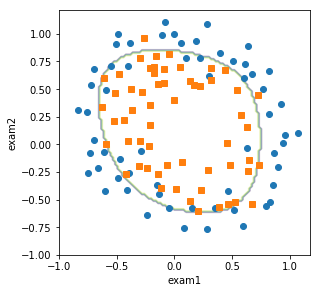

In [38]:
plt.figure(figsize=(4.5, 4.5))
plt.contour(XX1, XX2, YY, alpha=0.2)
plt.plot(X[~y, 0], X[~y, 1], 'o')
plt.plot(X[y, 0], X[y, 1], 's')
plt.xlabel('exam1'); plt.ylabel('exam2');